# EDA

Investigar sobre:

* Hedonic pricing
* Rosen model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium


import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

def mean_absolute_percentage_error(y_pred, y_true):
    y_true = np.where(y_true == 0, 0.0000000001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true))


plt.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241946 entries, 0 to 244487
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     241946 non-null  int64  
 1   area                   241946 non-null  float64
 2   ascensor               86824 non-null   float64
 3   balcon                 59525 non-null   float64
 4   banos                  240575 non-null  float64
 5   banoservicio           12083 non-null   float64
 6   conjuntocerrado        241946 non-null  int64  
 7   cuartoservicio         54524 non-null   float64
 8   deposito               106584 non-null  float64
 9   estrato                234673 non-null  float64
 10  estudio                75730 non-null   float64
 11  garajes                210842 non-null  float64
 12  gimnasio               71942 non-null   float64
 13  habitaciones           241272 non-null  float64
 14  halldealcobas          63851 non-nul

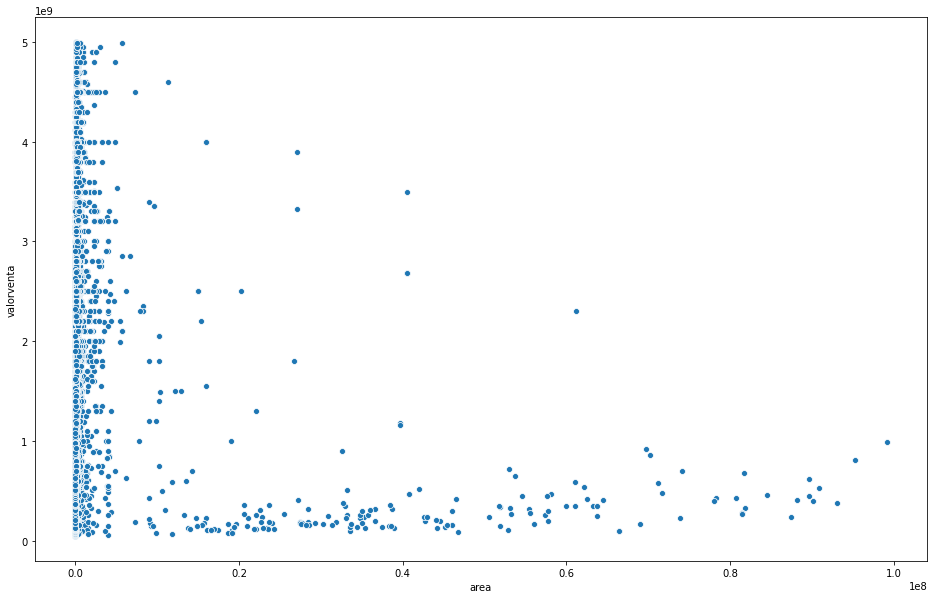

In [5]:
sns.scatterplot(train['area']**2, train['valorventa'])

In [71]:
train['garajes'].fillna(0,inplace=True).value_counts()

1.000     84078
2.000     81956
0.000     40119
3.000     20186
4.000     12465
5.000       643
6.000       469
8.000       119
7.000       112
10.000       67
9.000        23
Name: garajes, dtype: int64

In [83]:
train[train['tipoinmueble'] =="Casa"]['tiempodeconstruido'].value_counts()

Entre 10 y 20 años    9014
16 a 30 años          8920
Más de 30 años        6687
9 a 15 años           6102
Más de 20 años        4914
1 a 8 años            2552
Entre 5 y 10 años     1701
Entre 0 y 5 años       783
Remodelado             751
Menos de 1 año         554
Name: tiempodeconstruido, dtype: int64

In [32]:
train[train['tipoinmueble'] =="Casa"]['priceMT2'].describe()

count    5.671700e+04
mean     4.020582e+06
std      2.535258e+07
min      1.226994e+04
25%      2.257143e+06
50%      3.323650e+06
75%      4.388889e+06
max      3.800000e+09
Name: priceMT2, dtype: float64

In [9]:
train.isna().sum() / train.shape[0]

id                       0.000000
area                     0.000000
ascensor                 0.641143
balcon                   0.753974
banos                    0.005667
banoservicio             0.950059
conjuntocerrado          0.000000
cuartoservicio           0.774644
deposito                 0.559472
estrato                  0.030060
estudio                  0.686996
garajes                  0.128558
gimnasio                 0.702653
habitaciones             0.002786
halldealcobas            0.736094
parqueaderovisitantes    0.754210
piscina                  0.928868
piso                     0.486559
porteria                 0.922458
remodelado               0.904917
saloncomunal             0.552727
terraza                  0.826284
tiempodeconstruido       0.247200
vigilancia               0.413241
vista                    0.581332
zonalavanderia           0.393121
valoradministracion      0.114567
valorventa               0.000000
tipoinmueble             0.000000
tiponegocio   

In [8]:
train['vista'].value_counts()

Exterior    79242
Interior    22053
Name: vista, dtype: int64

In [58]:
train

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud,highPrice,priceMT2
0,1205404,55.0,NaN,NaN,NaN,NaN,0,NaN,1.0,3.0,...,NaN,1.0,50000.0,1.699500e+08,Casa,Venta,4.560965,-74.094889,Normal,3.090000e+06
1,1204371,43.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,NaN,NaN,0.0,9.000000e+07,Casa,Venta,4.576960,-74.100083,Normal,2.093023e+06
2,1125353,360.0,NaN,NaN,NaN,NaN,0,NaN,0.0,3.0,...,NaN,NaN,0.0,1.100000e+09,Casa,Venta,4.575000,-74.101000,High,3.055556e+06
3,1125506,60.0,NaN,NaN,NaN,1.0,0,1.0,0.0,3.0,...,NaN,NaN,0.0,2.600000e+08,Apartamento,Venta,4.575924,-74.108039,Normal,4.333333e+06
4,1204569,72.0,NaN,NaN,NaN,NaN,0,NaN,0.0,2.0,...,NaN,1.0,0.0,1.250000e+08,Casa,Venta,4.559000,-74.097000,Normal,1.736111e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244483,6262941,235.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,NaN,1.0,NaN,8.056924e+08,Casa,Venta,4.737393,-74.038282,High,3.428478e+06
244484,6262942,225.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,NaN,1.0,NaN,7.509566e+08,Casa,Venta,4.734240,-74.038518,High,3.337585e+06
244485,6262943,235.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,NaN,1.0,NaN,7.525618e+08,Casa,Venta,4.736392,-74.040659,High,3.202391e+06
244486,6262944,232.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,NaN,1.0,NaN,7.049425e+08,Casa,Venta,4.737524,-74.040292,High,3.038545e+06


In [47]:
np.quantile(train['area'], 0.99)

nan

In [51]:
train.describe(include='all')

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud,highPrice,priceMT2
count,2.436690e+05,243669.000000,87394.0,59938.0,242276.000000,12202.0,243669.000000,55344.0,107233.000000,236346.000000,...,101978,147768.0,2.155130e+05,2.436690e+05,243669,242900,243669.000000,243669.000000,243669,2.436690e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,2,4,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Exterior,NaN,NaN,NaN,Apartamento,Venta,NaN,NaN,Normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79843,NaN,NaN,NaN,186255,231766,NaN,NaN,121917,NaN
mean,6.022807e+05,151.351532,1.0,1.0,2.793628,1.0,0.319856,1.0,0.873388,4.402617,...,NaN,1.0,2.255721e+06,7.654023e+08,NaN,NaN,4.686660,-74.072320,NaN,5.547770e+06
std,4.054395e+05,214.691319,0.0,0.0,1.662693,0.0,0.466422,0.0,0.332540,1.321793,...,NaN,0.0,5.842945e+07,7.999841e+08,NaN,NaN,0.048998,0.038240,NaN,2.573209e+07
min,6.000000e+00,0.000000,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000,...,NaN,1.0,0.000000e+00,5.300000e+07,NaN,NaN,3.890660,-74.362167,NaN,0.000000e+00
25%,2.834050e+05,69.000000,1.0,1.0,2.000000,1.0,0.000000,1.0,1.000000,3.000000,...,NaN,1.0,5.000000e+04,3.000000e+08,NaN,NaN,4.657966,-74.090210,NaN,3.586957e+06
50%,5.302930e+05,105.000000,1.0,1.0,3.000000,1.0,0.000000,1.0,1.000000,4.000000,...,NaN,1.0,2.900000e+05,5.000000e+08,NaN,NaN,4.695000,-74.058998,NaN,4.791667e+06
75%,9.068150e+05,183.000000,1.0,1.0,4.000000,1.0,1.000000,1.0,1.000000,6.000000,...,NaN,1.0,6.076000e+05,9.000000e+08,NaN,NaN,4.720134,-74.045471,NaN,6.301370e+06


In [52]:
train['tipoinmueble'].value_counts()

Apartamento    186255
Casa            57414
Name: tipoinmueble, dtype: int64

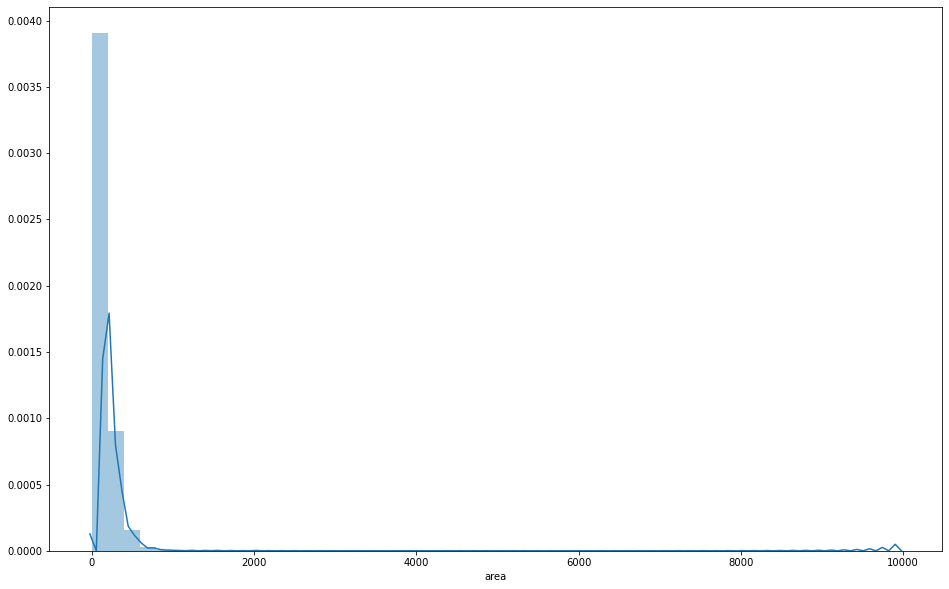

In [53]:
sns.distplot(train['area'])

In [23]:
train[train['valorventa'] < 1000000000]

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
0,1205404,55.0,NaN,NaN,NaN,NaN,0,NaN,1.0,3.0,...,NaN,NaN,NaN,1.0,50000.0,169950000.0,Casa,Venta,4.560965,-74.094889
1,1204371,43.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,90000000.0,Casa,Venta,4.576960,-74.100083
3,1125506,60.0,NaN,NaN,NaN,1.0,0,1.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.0,260000000.0,Apartamento,Venta,4.575924,-74.108039
4,1204569,72.0,NaN,NaN,NaN,NaN,0,NaN,0.0,2.0,...,NaN,NaN,NaN,1.0,0.0,125000000.0,Casa,Venta,4.559000,-74.097000
5,1161678,126.0,NaN,NaN,NaN,1.0,0,NaN,1.0,3.0,...,NaN,NaN,Exterior,1.0,0.0,600000000.0,Casa,Venta,4.588146,-74.107008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244483,6262941,235.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,Más de 20 años,NaN,NaN,1.0,NaN,805692395.0,Casa,Venta,4.737393,-74.038282
244484,6262942,225.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,Más de 20 años,NaN,NaN,1.0,NaN,750956587.0,Casa,Venta,4.734240,-74.038518
244485,6262943,235.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,Más de 20 años,NaN,NaN,1.0,NaN,752561771.0,Casa,Venta,4.736392,-74.040659
244486,6262944,232.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,Más de 20 años,NaN,NaN,1.0,NaN,704942538.0,Casa,Venta,4.737524,-74.040292


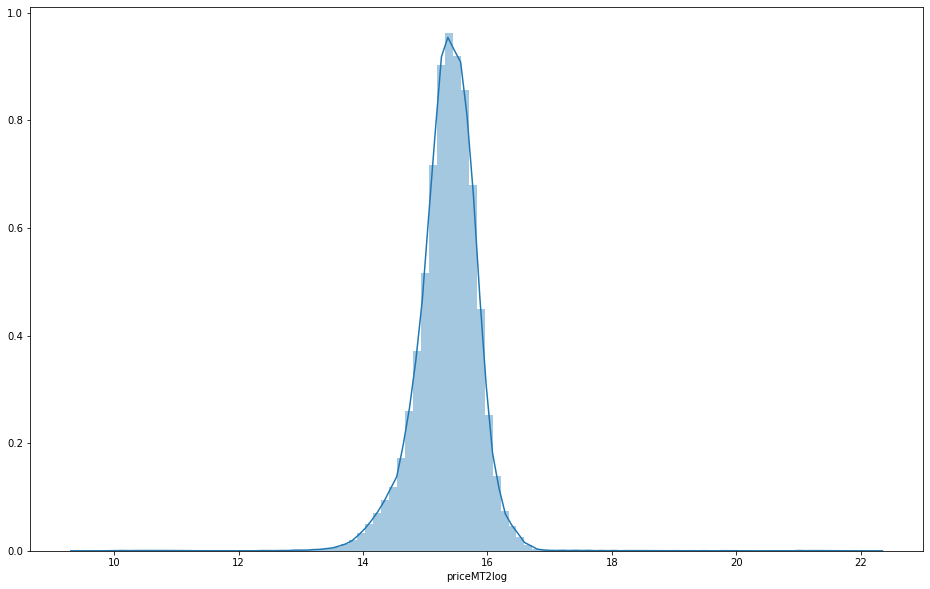

In [140]:
sns.distplot(train['priceMT2log'], bins=100)

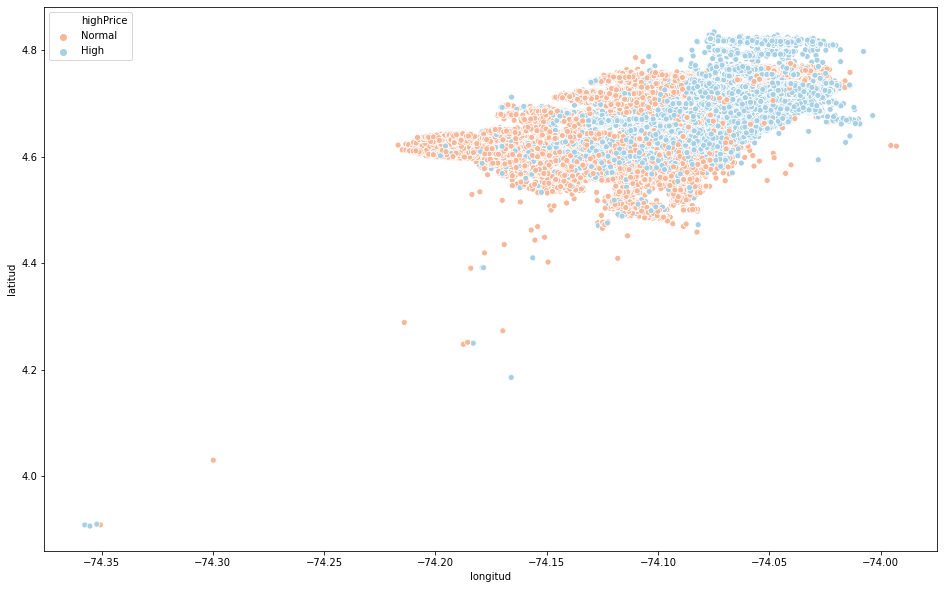

In [139]:
sns.scatterplot(x='longitud',y= 'latitud', data= houses_only, hue = 'highPrice', palette='RdBu')

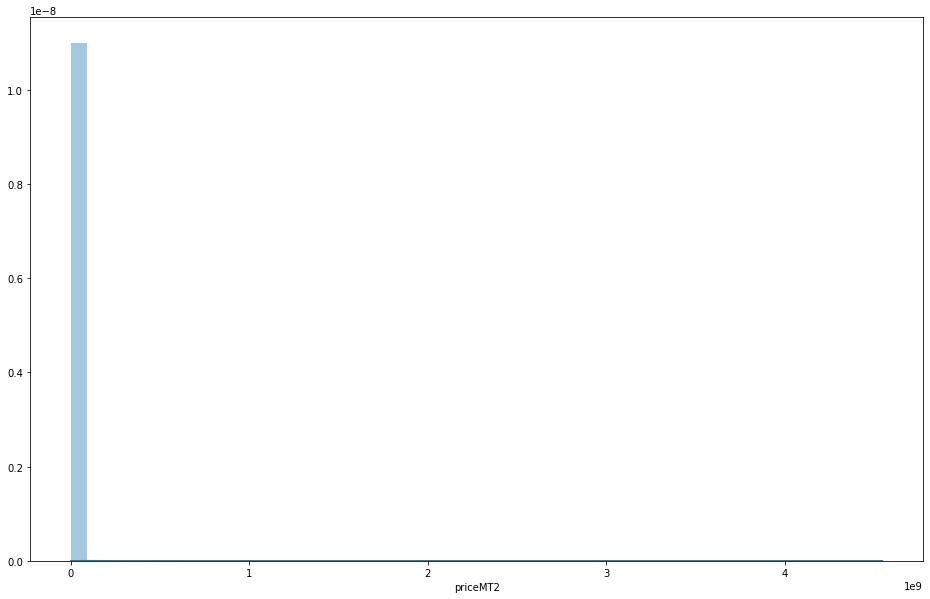

In [56]:
sns.distplot(train['priceMT2'])

In [42]:
train.corr()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,terraza,vigilancia,zonalavanderia,valoradministracion,valorventa,latitud,longitud,priceMT2,valorventalog,priceMT2log
id,1.000,-0.006,nan,nan,-0.019,nan,-0.015,nan,-0.421,-0.144,...,nan,0.007,nan,-0.007,-0.078,-0.046,-0.107,-0.094,-0.093,-0.099
area,-0.006,1.000,nan,nan,0.263,nan,-0.048,nan,-0.020,0.126,...,nan,-0.005,nan,0.017,0.409,0.015,0.057,-0.057,0.380,-0.260
ascensor,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balcon,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
banos,-0.019,0.263,nan,nan,1.000,nan,-0.051,nan,0.020,0.264,...,nan,0.010,nan,0.014,0.444,0.064,0.158,0.118,0.512,0.088
banoservicio,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
conjuntocerrado,-0.015,-0.048,nan,nan,-0.051,nan,1.000,nan,0.288,-0.034,...,nan,0.233,nan,0.001,-0.046,0.166,-0.019,-0.019,-0.079,0.027
cuartoservicio,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
deposito,-0.421,-0.020,nan,nan,0.020,nan,0.288,nan,1.000,0.239,...,nan,0.453,nan,0.011,0.071,0.118,0.208,0.197,0.129,0.234
estrato,-0.144,0.126,nan,nan,0.264,nan,-0.034,nan,0.239,1.000,...,nan,0.060,nan,0.024,0.532,0.247,0.633,0.659,0.692,0.667


In [154]:
np.quantile(houses_only['valorventa'],0.99)

5000000000.0

# Baseline model

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243669 entries, 0 to 244487
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     243669 non-null  int64  
 1   area                   243669 non-null  float64
 2   ascensor               87394 non-null   float64
 3   balcon                 59938 non-null   float64
 4   banos                  242276 non-null  float64
 5   banoservicio           12202 non-null   float64
 6   conjuntocerrado        243669 non-null  int64  
 7   cuartoservicio         55344 non-null   float64
 8   deposito               107233 non-null  float64
 9   estrato                236346 non-null  float64
 10  estudio                76530 non-null   float64
 11  garajes                212491 non-null  float64
 12  gimnasio               72583 non-null   float64
 13  habitaciones           242962 non-null  float64
 14  halldealcobas          64475 non-nul

In [2]:
RIDICULOUS_PRICE = 5000000000
RIRIDULOUS_AREA = 10000

train = pd.read_csv("../data/train_data.csv")
train['highPrice'] = np.where(train['valorventa'] > 500000000, "High", "Normal")
train['priceMT2'] = train['valorventa'] / train['area']
train['valorventalog'] = np.log1p(train['valorventa'])
train.replace([np.inf], np.nan, inplace=True)
train.dropna(subset=['priceMT2'], inplace=True)
train = train[train['priceMT2'] < np.quantile(train['priceMT2'], 0.99)]
train['priceMT2log'] = np.log1p(train['priceMT2'])

train = train[(train['valorventa'] < RIDICULOUS_PRICE) &
              (train['area'] < RIRIDULOUS_AREA)]

train

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud,highPrice,priceMT2,valorventalog,priceMT2log
0,1205404,55.000,nan,nan,nan,nan,0,nan,1.000,3.000,...,50000.000,169950000.000,Casa,Venta,4.561,-74.095,Normal,3090000.000,18.951,14.944
1,1204371,43.000,nan,nan,nan,nan,0,nan,0.000,nan,...,0.000,90000000.000,Casa,Venta,4.577,-74.100,Normal,2093023.256,18.315,14.554
2,1125353,360.000,nan,nan,nan,nan,0,nan,0.000,3.000,...,0.000,1100000000.000,Casa,Venta,4.575,-74.101,High,3055555.556,20.819,14.932
3,1125506,60.000,nan,nan,nan,1.000,0,1.000,0.000,3.000,...,0.000,260000000.000,Apartamento,Venta,4.576,-74.108,Normal,4333333.333,19.376,15.282
4,1204569,72.000,nan,nan,nan,nan,0,nan,0.000,2.000,...,0.000,125000000.000,Casa,Venta,4.559,-74.097,Normal,1736111.111,18.644,14.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244483,6262941,235.000,nan,nan,4.000,nan,0,1.000,nan,4.000,...,nan,805692395.000,Casa,Venta,4.737,-74.038,High,3428478.277,20.507,15.048
244484,6262942,225.000,nan,nan,4.000,nan,0,1.000,nan,4.000,...,nan,750956587.000,Casa,Venta,4.734,-74.039,High,3337584.831,20.437,15.021
244485,6262943,235.000,nan,nan,4.000,nan,0,1.000,nan,4.000,...,nan,752561771.000,Casa,Venta,4.736,-74.041,High,3202390.515,20.439,14.979
244486,6262944,232.000,nan,nan,4.000,nan,0,1.000,nan,4.000,...,nan,704942538.000,Casa,Venta,4.738,-74.040,High,3038545.422,20.374,14.927


In [36]:
class DataFrameBuilder:
    
    RIDICULOUS_PRICE = 5000000000
    RIDICULOUS_AREA = 10000
    
    def __init__(self, dataframe, test=False):
        self.test = test
        self.original_dataframe = dataframe.copy()
        self.modeling_dataframe = None
        
    
    def filterRows(self, dataframe):
        return dataframe[
                        #(dataframe['tipoinmueble'] == "Casa") &
                        (dataframe['valorventa'] < DataFrameBuilder.RIDICULOUS_PRICE) &
                          (dataframe['area'] < DataFrameBuilder.RIDICULOUS_AREA) &
                           (dataframe['tiponegocio'] != "Arriendo")
                         
                        ]
    
    def filterColumns(self, dataframe):
        return dataframe.drop([
            "ascensor"
            
        ], axis=1)
    
    def createVars(self, dataframe):
        
        cat_vars = ['tiempodeconstruido']

        #dummified = []
        #for var in cat_vars:            
        #    dummified.append(
        #            pd.get_dummies(dataframe[var], drop_first=True, prefix=var)
        #    )

        #dummified = pd.concat(dummified, axis=1)
        #dataframe = pd.concat([dataframe.drop(cat_vars, axis=1),dummified], axis=1)
        #encoder = OneHotEncoder(handle_unknown = 'ignore')


        #for col in dummified.columns:
        #    features.append(col)
            
        #dataframe['priceMT2'] = dataframe['valorventa'] / dataframe['area']
        #dataframe['priceMT2log'] = np.log1p(dataframe['priceMT2'])
        
        # Imputacion
        dataframe['garajes'].fillna(0,inplace=True)
        dataframe['banoservicio'].fillna(0,inplace=True)
        dataframe['cuartoservicio'].fillna(0,inplace=True)
        dataframe['estudio'].fillna(0,inplace=True)
        dataframe['balcon'].fillna(0,inplace=True)
        dataframe['deposito'].fillna(0,inplace=True)
        dataframe['piscina'].fillna(0,inplace=True)
        dataframe['saloncomunal'].fillna(0,inplace=True)
        dataframe['valoradministracion'].fillna(0,inplace=True)
        dataframe['porteria'].fillna(0,inplace=True)
        dataframe['terraza'].fillna(0,inplace=True)
        dataframe['piso'].fillna(50,inplace=True)
        dataframe['remodelado'].fillna(0,inplace=True)
        dataframe['zonalavanderia'].fillna(0,inplace=True)
        dataframe['halldealcobas'].fillna(0, inplace=True)
        dataframe['parqueaderovisitantes'].fillna(0,inplace=True)
        dataframe['banos'].fillna(dataframe['banos'].mode()[0], inplace=True)
        dataframe['habitaciones'].fillna(dataframe['habitaciones'].mode()[0], inplace=True)
        dataframe['estrato'].fillna(dataframe['estrato'].mode()[0], inplace=True)
        dataframe['valorventalog'] = np.log1p(dataframe['valorventa'])
        dataframe['tiempodeconstruido'].fillna("Entre 5 y 10 años", inplace=True)
        dataframe['antiqueness'] = \
            np.where(dataframe['tiempodeconstruido'].isin(["Menos de 1 año", "Entre 0 y 5 años", "1 a 8 años"]), 1,
                np.where(dataframe['tiempodeconstruido'].isin(['9 a 15 años','Entre 5 y 10 años','Remodelado',
                                                                'Entre 10 y 20 años']),2,3)
                     
                                           )
        dataframe['tipo_inmueble'] = np.where(dataframe['tipoinmueble'] == "Casa",1,0)
        
        return dataframe
        
    def process(self):
        filter_df = self.filterColumns(
                        self.filterRows(self.original_dataframe))
        self.modeling_dataframe = self.createVars(filter_df)
        return self.modeling_dataframe
    
features = [
            "longitud",
            "latitud",
            "estrato",
            "conjuntocerrado",
            "banos",
            "habitaciones",
            "garajes",
            "banoservicio",
            "estudio",
            "cuartoservicio",
            "balcon",
            "antiqueness",
            "saloncomunal",
            "valoradministracion",
            "halldealcobas",
            "deposito",
            "piscina",
            "tipo_inmueble",
            "porteria",
            "terraza",
            "piso",
            "zonalavanderia",
            "remodelado",
            "parqueaderovisitantes",
            "area"
]

instance_df = DataFrameBuilder(train)
houses_only = instance_df.process()


y = houses_only['valorventalog']
X = houses_only[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
houses_only.isna().sum() / houses_only.shape[0]

id                      0.000
area                    0.000
balcon                  0.000
banos                   0.000
banoservicio            0.000
conjuntocerrado         0.000
cuartoservicio          0.000
deposito                0.000
estrato                 0.000
estudio                 0.000
garajes                 0.000
gimnasio                0.705
habitaciones            0.000
halldealcobas           0.000
parqueaderovisitantes   0.000
piscina                 0.000
piso                    0.000
porteria                0.000
remodelado              0.000
saloncomunal            0.000
terraza                 0.000
tiempodeconstruido      0.000
vigilancia              0.414
vista                   0.582
zonalavanderia          0.000
valoradministracion     0.000
valorventa              0.000
tipoinmueble            0.000
tiponegocio             0.003
latitud                 0.000
longitud                0.000
highPrice               0.000
priceMT2                0.000
valorventa

In [5]:
houses_only['vista'].value_counts()

Exterior    78411
Interior    21916
Name: vista, dtype: int64

In [6]:
X

,longitud,latitud,estrato,conjuntocerrado,banos,habitaciones,garajes,banoservicio,estudio,cuartoservicio,...,deposito,piscina,tipo_inmueble,porteria,terraza,piso,zonalavanderia,remodelado,parqueaderovisitantes,area
0,-74.095,4.561,3.000,0,2.000,2.000,0.000,0.000,0.000,0.000,...,1.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,55.000
1,-74.100,4.577,6.000,0,2.000,3.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1,0.000,0.000,50.000,0.000,0.000,0.000,43.000
2,-74.101,4.575,3.000,0,2.000,3.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1,0.000,0.000,50.000,0.000,0.000,0.000,360.000
3,-74.108,4.576,3.000,0,2.000,3.000,0.000,1.000,0.000,1.000,...,0.000,0.000,0,0.000,0.000,50.000,0.000,1.000,0.000,60.000
4,-74.097,4.559,2.000,0,2.000,2.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,72.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244483,-74.038,4.737,4.000,0,4.000,4.000,2.000,0.000,1.000,1.000,...,0.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,235.000
244484,-74.039,4.734,4.000,0,4.000,4.000,2.000,0.000,1.000,1.000,...,0.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,225.000
244485,-74.041,4.736,4.000,0,4.000,4.000,2.000,0.000,1.000,1.000,...,0.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,235.000
244486,-74.040,4.738,4.000,0,4.000,4.000,2.000,0.000,1.000,1.000,...,0.000,0.000,1,0.000,0.000,50.000,1.000,0.000,0.000,232.000


# TODO

1. INFERIR ESTRATO CON KNN APARTIR DE LAS COORDENADAS


In [ ]:
houses_only['priceMT2'].describe()

In [45]:
train['tiempodeconstruido'].value_counts()

Entre 10 y 20 años    34639
16 a 30 años          28517
1 a 8 años            24744
9 a 15 años           21726
Entre 0 y 5 años      20800
Entre 5 y 10 años     16711
Más de 20 años        15638
Más de 30 años        11879
Menos de 1 año         4256
Remodelado             1980
ntre 0 y 5 años           9
Name: tiempodeconstruido, dtype: int64

In [38]:
xgb_reg = xgb.XGBRegressor(max_depth=10)
lgbm_reg = lgb.LGBMRegressor()
knnr = KNeighborsRegressor()

In [39]:
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
xgb_predictions = np.expm1(xgb_reg.predict(X_test)) 
lgbm_predictions = np.expm1(lgbm_reg.predict(X_test)) 
knn_predictions = np.expm1(knnr.predict(X_test)) 
real_price = np.expm1(y_test)

In [41]:
print(f"RMSE: XGBOOST {mean_squared_error(real_price, xgb_predictions)**0.5}")
print(f"MAE XGBOOST {mean_absolute_error(real_price, xgb_predictions)}")
print(f"MAPE: XGBOOST {mean_absolute_percentage_error(xgb_predictions, real_price)} \n")

print(f"RMSE LGBM: {mean_squared_error(real_price, lgbm_predictions)**0.5}")
print(f"MAE LGBM {mean_absolute_error(real_price, lgbm_predictions)}")
print(f"MAPE: LGBM {mean_absolute_percentage_error(lgbm_predictions, real_price)} \n")

print(f"RMSE KNN: {mean_squared_error(real_price, knn_predictions)**0.5}")
print(f"MAE KNN {mean_absolute_error(real_price, knn_predictions)}")
print(f"MAPE KNN: {mean_absolute_percentage_error(knn_predictions, real_price)} \n")


print(f"RMSE: {mean_squared_error(real_price, lgbm_predictions*0.5 + xgb_predictions*0.5)**0.5}")
print(f"MAE {mean_absolute_error(real_price, lgbm_predictions*0.5 + xgb_predictions*0.5)}")
print(f"MAPE: {mean_absolute_percentage_error(lgbm_predictions*0.5 + xgb_predictions*0.5, real_price)} \n ")


RMSE: XGBOOST 202379254.47180295
MAE XGBOOST 101584278.67190695
MAPE: XGBOOST 0.1320373737558912 

RMSE LGBM: 228935730.1386923
MAE LGBM 117128349.87721863
MAPE: LGBM 0.15068591303790177 

RMSE KNN: 288530298.21562403
MAE KNN 145449425.87217337
MAPE KNN: 0.19389116345631224 

RMSE: 207430679.52193183
MAE 105584664.54407719
MAPE: 0.13677719314159945 
 


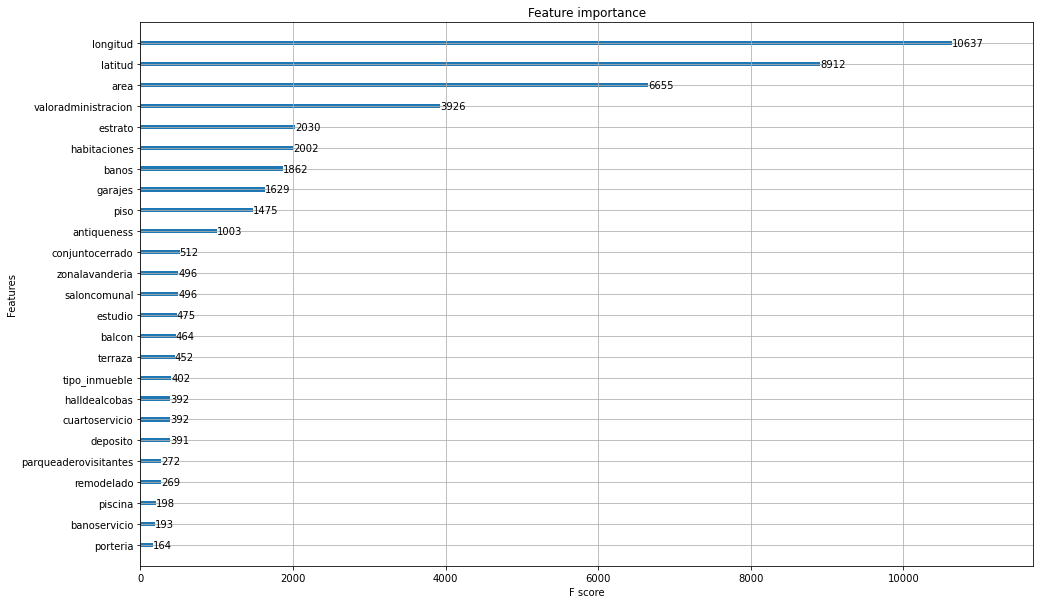

In [42]:
xgb.plot_importance(xgb_reg)

# Predictions

In [25]:
test = pd.read_csv("../data/test_data.csv")
test['priceMT2'] = test['valorventa'] / test['area']

test_predictions_df = DataFrameBuilder(test).process()
test_predictions_df

,id,area,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,estudio,...,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud,priceMT2,valorventalog,antiqueness,tipo_inmueble
0,877392,104.000,0.000,2.000,0.000,0,0.000,0.000,2.000,0.000,...,0.000,185000000.000,Casa,Venta,4.712,-74.132,1778846.154,19.036,2,1
1,201483,144.000,0.000,2.000,0.000,0,0.000,1.000,3.000,1.000,...,0.000,498000000.000,Casa,Venta,4.701,-74.090,3458333.333,20.026,1,1
2,188674,144.000,0.000,2.000,0.000,0,0.000,0.000,3.000,0.000,...,0.000,498000000.000,Casa,Venta,4.701,-74.090,3458333.333,20.026,1,1
3,1211067,145.000,0.000,2.000,0.000,0,0.000,1.000,3.000,1.000,...,0.000,519000000.000,Casa,Venta,4.703,-74.091,3579310.345,20.067,2,1
4,883437,145.000,0.000,2.000,0.000,0,0.000,1.000,3.000,1.000,...,0.000,517000000.000,Casa,Venta,4.701,-74.093,3565517.241,20.064,2,1
5,332550,145.000,0.000,2.000,0.000,0,0.000,1.000,3.000,0.000,...,0.000,514990000.000,Casa,Venta,4.702,-74.092,3551655.172,20.060,1,1
6,320585,145.000,0.000,2.000,0.000,0,0.000,1.000,3.000,0.000,...,0.000,510000000.000,Casa,Venta,4.699,-74.093,3517241.379,20.050,1,1
7,776969,145.000,0.000,2.000,0.000,0,0.000,1.000,3.000,0.000,...,0.000,520000000.000,Casa,Venta,4.702,-74.092,3586206.897,20.069,2,1
8,435344,105.000,0.000,2.000,0.000,0,0.000,0.000,2.000,1.000,...,0.000,215000000.000,Casa,Venta,4.710,-74.133,2047619.048,19.186,1,1
9,1274573,146.000,0.000,2.000,0.000,0,0.000,1.000,3.000,1.000,...,0.000,519000000.000,Casa,Venta,4.699,-74.091,3554794.521,20.067,2,1


In [28]:
test_predictions

array([19.15536 , 19.901695, 19.821459, 19.896639, 19.912352, 19.943008,
       19.966715, 19.898073, 19.144957, 19.886341, 19.914999, 19.892532,
       19.936522, 19.961401, 19.948448, 19.892473, 19.859781, 19.727543,
       19.649487, 19.656645, 19.644125, 19.671154, 19.75807 , 19.649487,
       19.753584, 19.753584, 19.671154, 19.646511, 19.632002, 19.69109 ,
       19.617567, 19.612078, 19.612078, 19.623856, 19.629562, 19.725716,
       19.879923, 19.893332, 19.873209, 19.891693, 19.873209, 19.879923,
       19.879923, 19.859295, 19.873209, 19.879923, 19.873209, 20.44041 ,
       20.41637 , 20.44041 , 20.44651 , 20.42247 , 20.684351],
      dtype=float32)

In [29]:
test_predictions = np.expm1(xgb_reg.predict(test_predictions_df[features]))
print(f"RMSE: {mean_squared_error(test_predictions_df['valorventa'], test_predictions)**0.5}")
print(f"MAE {mean_absolute_error(test_predictions_df['valorventa'], test_predictions)}")
print(f"MAPE: {mean_absolute_percentage_error(test_predictions, test_predictions_df['valorventa'])} ")

RMSE: 54639504.29895727
MAE 47019520.30188679
MAPE: 0.11162267313722325 


In [77]:
submission = pd.read_csv("../data/example_submission.csv")
submission['valormt2_predicted'] = (test_predictions / test_predictions_df['area']) 
submission.head()

,id,valormt2_predicted
0,188674,1897196.769
1,883437,2843491.556
2,320585,2619457.333
3,946955,3050823.062
4,425047,3036414.455


In [78]:
submission['valormt2_predicted'].unique()

array([1897196.76923077, 2843491.55555556, 2619457.33333333,
       3050823.06206897, 3036414.45517241, 2775369.93103448,
       2781400.49655172, 3070742.28965517, 2076853.63809524,
       2816751.78082192, 3036510.90410959, 2797130.08219178,
       2832662.85714286, 2852533.76870748, 2565999.02040816,
       2592757.12      , 2444729.55555556, 2609931.77777778,
       2521939.11111111, 2548383.77777778, 2321857.33333333,
       2370435.33333333, 2418520.66666667, 2371828.22222222,
       2460503.55555556, 2640757.33333333, 2669260.05797101,
       2568599.54285714, 2567546.51428571, 2669189.48571429,
       2641798.4       , 2566821.94285714, 2426896.91428571,
       2751948.8       , 2502511.36      , 2538436.69333333,
       3733185.70666667, 2636426.88      , 2601654.18666667,
       2677464.32      , 3033584.13913043, 2981094.95652174,
       3182687.72173913, 3031779.33913043, 4773362.64347826])

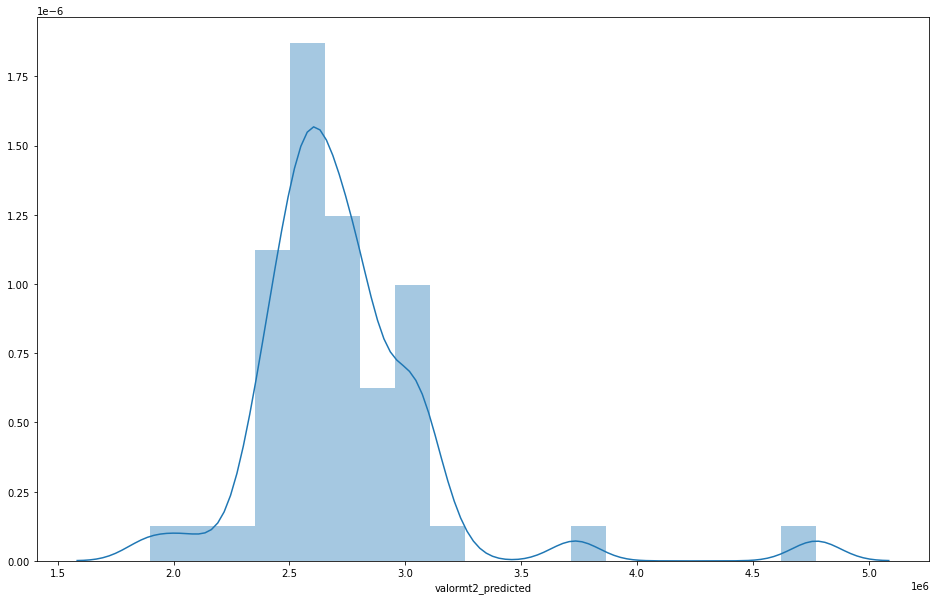

In [79]:
sns.distplot(submission['valormt2_predicted'])

In [80]:
submission.to_csv("XGB_submission_alldata.csv", index=False)